<a href="https://colab.research.google.com/github/Ravindharnath/Miniprojects/blob/main/miniproject_4_Ebola_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tabulate import tabulate
import traceback
import numpy as np
import matplotlib.pyplot as plt
from requests import get
import requests
import os


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
Data = pd.read_csv(r'/content/gdrive/My Drive/mini project/ebola_data_db_format.csv')

In [ ]:
display(pd.DataFrame(Data))
df = pd.DataFrame(Data)

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0
...,...,...,...,...
17580,"Cumulative number of confirmed, probable and s...",Spain,2016-03-23,0.0
17581,Cumulative number of confirmed Ebola deaths,United States of America,2016-03-23,1.0
17582,Cumulative number of probable Ebola deaths,United States of America,2016-03-23,0.0
17583,Cumulative number of suspected Ebola deaths,United States of America,2016-03-23,0.0


1)**Distinct # of Indicators in the universe (complete dataset).**

In [ ]:
distinct_indicators = df['Indicator'].nunique()  # Replace 'Indicator' with the actual column name
print(f"Distinct # of Indicators")
print(distinct_indicators)

Distinct # of Indicators
36


2)**In the second half of the year 2015, how many countries have one or more “Cumulative number of confirmed Ebola cases.**

In [ ]:
df['Year'] = df['Date'].str[:4]
df['Month'] = df['Date'].str[5:7]

df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

second_half_2015 = df[(df['Year'] == 2015) & (df['Month'] >= 7) & (df['Indicator'] == 'Cumulative number of confirmed Ebola cases')]

countries_with_cases = second_half_2015['Country'].nunique()

table = [['Distinct Countries with Confirmed Cases in 2nd Half of 2015', countries_with_cases]]

print(tabulate(table, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------------------------------------------+---------+
| Metric                                                      |   Value |
+=============================================================+=========+
| Distinct Countries with Confirmed Cases in 2nd Half of 2015 |      11 |
+-------------------------------------------------------------+---------+


3)**Top 10 total Ebola cases confirmed. Note that Indicator = Cumulative number of confirmed Ebola cases. Include rank based on the total value (=cases confirmed)**

In [ ]:
confirmed_cases = df[df['Indicator'] == 'Cumulative number of confirmed Ebola cases']

total_cases_by_country = confirmed_cases.groupby('Country')['value'].sum().reset_index()

total_cases_by_country['Rank'] = total_cases_by_country['value'].rank(ascending=False)

top_10_countries = total_cases_by_country.sort_values(by='value', ascending=False).head(10)

table = tabulate(top_10_countries[['Country', 'value', 'Rank']],
                 headers=['Country', 'Total Confirmed Cases', 'Rank'],
                 tablefmt='grid')

print(table)


+----+--------------------------+-------------------------+--------+
|    | Country                  |   Total Confirmed Cases |   Rank |
+====+==========================+=========================+========+
|  8 | Sierra Leone             |             2.04187e+06 |      1 |
+----+--------------------------+-------------------------+--------+
|  3 | Liberia                  |        768079           |      2 |
+----+--------------------------+-------------------------+--------+
|  0 | Guinea                   |        749622           |      3 |
+----+--------------------------+-------------------------+--------+
|  6 | Nigeria                  |          4840           |      4 |
+----+--------------------------+-------------------------+--------+
|  5 | Mali                     |          1658           |      5 |
+----+--------------------------+-------------------------+--------+
| 11 | United States of America |           967           |      6 |
+----+--------------------------+-

4)**Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” in 2015 Q2**

In [ ]:
df['Year'] = df['Date'].str[:4]
df['Month'] = df['Date'].str[5:7]

df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

q2_2015 = df[(df['Year'] == 2015) & (df['Month'].isin([4, 5, 6])) & (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]

total_deaths_q2 = q2_2015.groupby('Country')['value'].sum().reset_index()

total_deaths_q2['Rank'] = total_deaths_q2['value'].rank(ascending=False)

top_10_q2_2015 = total_deaths_q2.sort_values(by='value', ascending=False).head(10)

table = tabulate(top_10_q2_2015[['Country', 'value', 'Rank']],
                 headers=['Country', 'Total Deaths', 'Rank'],
                 tablefmt='grid')

print(table)


+----+--------------------------+----------------+--------+
|    | Country                  |   Total Deaths |   Rank |
+====+==========================+================+========+
|  2 | Liberia                  |         273262 |    1   |
+----+--------------------------+----------------+--------+
|  6 | Sierra Leone             |         226331 |    2   |
+----+--------------------------+----------------+--------+
|  0 | Guinea                   |         139652 |    3   |
+----+--------------------------+----------------+--------+
|  4 | Nigeria                  |            464 |    4   |
+----+--------------------------+----------------+--------+
|  3 | Mali                     |            348 |    5   |
+----+--------------------------+----------------+--------+
|  9 | United States of America |             58 |    6   |
+----+--------------------------+----------------+--------+
|  1 | Italy                    |              0 |    8.5 |
+----+--------------------------+-------

5)**Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” with only even months of the year 2015 (i.e., months 2, 4, 6, 8, 10, 12).**

In [ ]:
df['Year'] = df['Date'].str[:4]
df['Month'] = df['Date'].str[5:7]

df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

even_months = [2, 4, 6, 8, 10, 12]
odd_months = [1, 3, 5, 7, 9, 11]

even_months_2015 = df[(df['Year'] == 2015) & (df['Month'].isin(even_months)) & (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]

total_deaths_even_months = even_months_2015.groupby('Country')['value'].sum().reset_index()
total_deaths_even_months['Rank'] = total_deaths_even_months['value'].rank(ascending=False)

top_10_even_months = total_deaths_even_months.sort_values(by='value', ascending=False).head(10)

odd_months_2015 = df[(df['Year'] == 2015) & (df['Month'].isin(odd_months)) &
                      (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]

total_deaths_odd_months = odd_months_2015.groupby('Country')['value'].sum().reset_index()
total_deaths_odd_months['Rank'] = total_deaths_odd_months['value'].rank(ascending=False)

top_10_odd_months = total_deaths_odd_months.sort_values(by='value', ascending=False).head(10)

even_months_table = tabulate(top_10_even_months[['Country', 'value', 'Rank']],
                             headers=['Country', 'Total Deaths (Even Months)', 'Rank'],
                             tablefmt='grid')

odd_months_table = tabulate(top_10_odd_months[['Country', 'value', 'Rank']],
                            headers=['Country', 'Total Deaths (Odd Months)', 'Rank'],
                            tablefmt='grid')

print("Top 10 Countries by Total Deaths in Even Months of 2015:")
print(even_months_table)

print("\nTop 10 Countries by Total Deaths in Odd Months of 2015:")
print(odd_months_table)



Top 10 Countries by Total Deaths in Even Months of 2015:
+----+--------------------------+------------------------------+--------+
|    | Country                  |   Total Deaths (Even Months) |   Rank |
+====+==========================+==============================+========+
|  2 | Liberia                  |                       483402 |    1   |
+----+--------------------------+------------------------------+--------+
|  7 | Sierra Leone             |                       402717 |    2   |
+----+--------------------------+------------------------------+--------+
|  0 | Guinea                   |                       252224 |    3   |
+----+--------------------------+------------------------------+--------+
|  5 | Nigeria                  |                          840 |    4   |
+----+--------------------------+------------------------------+--------+
|  4 | Mali                     |                          630 |    5   |
+----+--------------------------+----------------------

6)**Find Country and Indicator wise total value. Also, rank on the total_value which is the sum at the Country-Indicator level.**

In [ ]:
country_indicator_total = df.groupby(['Country', 'Indicator'])['value'].sum().reset_index()
country_indicator_total['Rank'] = country_indicator_total.groupby('Indicator')['value'].rank(ascending=False)
country_indicator_total_sorted = country_indicator_total.sort_values(by='value', ascending=False)

table = tabulate(country_indicator_total_sorted[['Country', 'Indicator', 'value', 'Rank']],
                 headers=['Country', 'Indicator', 'Total Value', 'Rank'],
                 tablefmt='grid')

print(table)



+-----+--------------------------+---------------------------------------------------------------------------------------------+------------------+--------+
|     | Country                  | Indicator                                                                                   |      Total Value |   Rank |
+=====+==========================+=============================================================================================+==================+========+
| 169 | Sierra Leone             | Cumulative number of confirmed, probable and suspected Ebola cases                          |      3.00343e+06 |    1   |
+-----+--------------------------+---------------------------------------------------------------------------------------------+------------------+--------+
|  60 | Liberia                  | Cumulative number of confirmed, probable and suspected Ebola cases                          |      2.45841e+06 |    2   |
+-----+--------------------------+------------------------

7)**For those Top 10 countries by Indicator = Cumulative number of confirmed Ebola cases, plot group bar chart.**

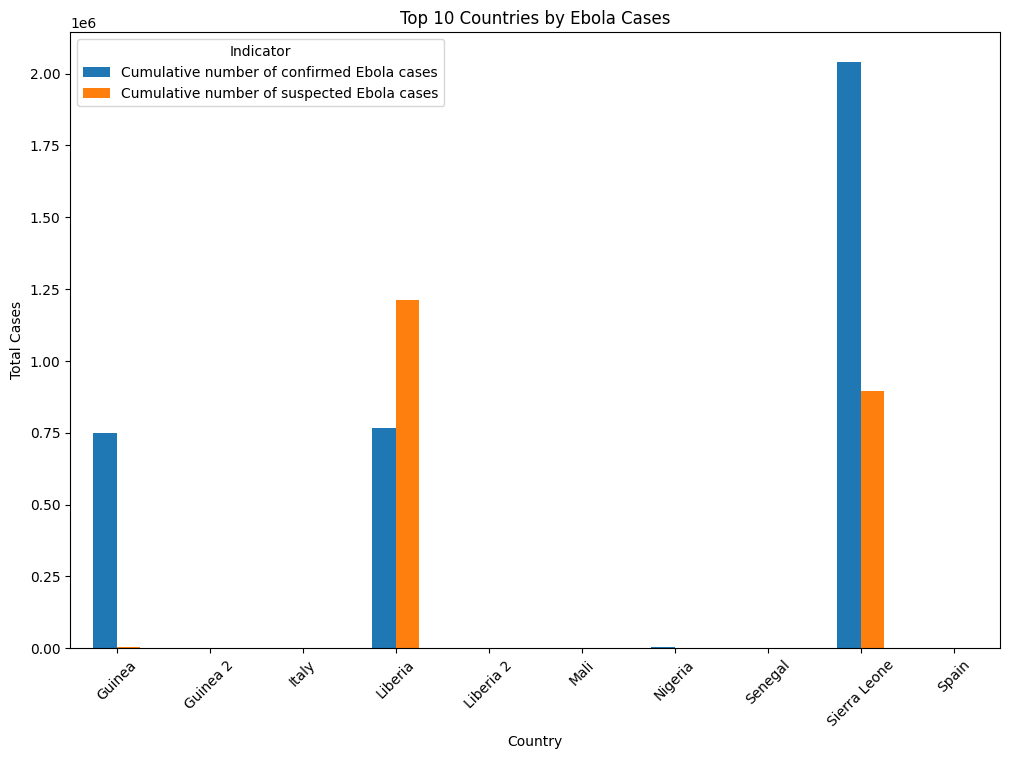

In [ ]:
X-axis -> Country
Y-axis -> Bar 1 -> total_value with Indicator = Cumulative number of suspected Ebola cases
Y-axis -> Bar 2 ->  total_value with Indicator = Cumulative number of confirmed Ebola cases"

import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 countries by confirmed Ebola cases
top_10_countries_confirmed = total_cases_by_country.head(10)['Country']

# Filter data for top 10 countries
top_10_data = df[df['Country'].isin(top_10_countries_confirmed) & df['Indicator'].isin(['Cumulative number of confirmed Ebola cases', 'Cumulative number of suspected Ebola cases'])]

# Group by country and indicator
grouped_data = top_10_data.groupby(['Country', 'Indicator'])['value'].sum().unstack()

# Plot
grouped_data.plot(kind='bar', figsize=(12, 8))
plt.title('Top 10 Countries by Ebola Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()
